In [ ]:
#Medición del tiempo de inicio
import time

# Registrar el tiempo actual en el momento del inicio
inicio = time.time()

# Carga de Paquetes y Librerias

In [ ]:
# Instalación de la biblioteca 'mapie'
!pip install mapie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Google
from google.colab import files  # Permite descargar archivos directamente desde Colab

# Mapie
from mapie.time_series_regression import MapieTimeSeriesRegressor
from mapie.subsample import BlockBootstrap
from mapie.metrics import regression_coverage_score, regression_mean_width_score

# Configuración de advertencias y mensajes

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )

# Mostrar advertencia personalizada
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
# Función para dividir una secuencia univariable en muestras

def TrainingSet(sequence, n_steps):
    """
    Divide una secuencia univariable en muestras de entrada y salida.

    Parámetros:
    - sequence (array-like): Secuencia univariable de valores.
    - n_steps (int): Número de pasos de tiempo en cada muestra.

    Retorna:
    - X (array-like): Matriz de muestras de entrada.
    - y (array-like): Vector de valores de salida correspondientes.

		Notas:
    - Esta función divide una secuencia univariable en muestras de entrada (X) y valores de salida (y).
    - 'sequence' es la secuencia de valores que se va a dividir en muestras.
    - 'n_steps' define el número de pasos de tiempo en cada muestra.
    - Para cada paso de tiempo, se forma una muestra que contiene 'n_steps' valores consecutivos.
    - La última muestra utiliza 'n_steps' valores finales de la secuencia.
    - La función devuelve matrices 'X' e 'y' que contienen las muestras de entrada y los valores de salida.
    """

    X, y = list(), list()

    for i in range(len(sequence)):
        end_ix = i + n_steps

        if end_ix > len(sequence) - 1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# Carga de Base de Datos

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Departamentos.zip

# Mostrar el contenido del directorio actual
!dir

--2023-07-30 03:21:33--  https://docs.google.com/uc?export=download&confirm=t&id=143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM
Resolving docs.google.com (docs.google.com)... 172.217.218.101, 172.217.218.139, 172.217.218.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.218.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1oh0mfjchlifr2rkkl40b1e0ftl2dhk9/1690687275000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=2a145c50-aa40-4554-9941-bc17eb002bfc [following]
--2023-07-30 03:21:34--  https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1oh0mfjchlifr2rkkl40b1e0ftl2dhk9/1690687275000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=2a145c50-aa40-4554-9941-bc17eb002bfc
Resolving doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.googleusercontent.com)... 74.125.128.1

In [ ]:
# Mostrar listado de elementos
!ls

 Colombia_Demanda_Horaria.xlsx   Departamentos.zip
 Colombia.xlsx                   sample_data/
 D_Departamental_Horaria.xlsx    Todos_Departamentos_Depurado.xlsx
'Demanda_Caribe Ajustado.xlsx'


In [ ]:
# Carga y manipulación de datos de un archivo Excel

# Cargar los datos desde un archivo Excel en un DataFrame 'df1'
df1 = pd.read_excel('/content/Colombia_Demanda_Horaria.xlsx')

# Eliminar la columna 'Date' del DataFrame 'df1'
df1 = df1.drop('Date', axis=1)

# Generar un rango de fechas horarias y establecerlo como índice del DataFrame
date_rng = pd.date_range(start='2000-01-01', end='2023-01-01', freq='H')
df1.set_index(date_rng[0:-1], inplace=True)

# Imprimir información sobre el DataFrame 'df1'
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201624 entries, 2000-01-01 00:00:00 to 2022-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Demand  201624 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh/dia'}, xlabel='Fecha', ylabel='kWh'>

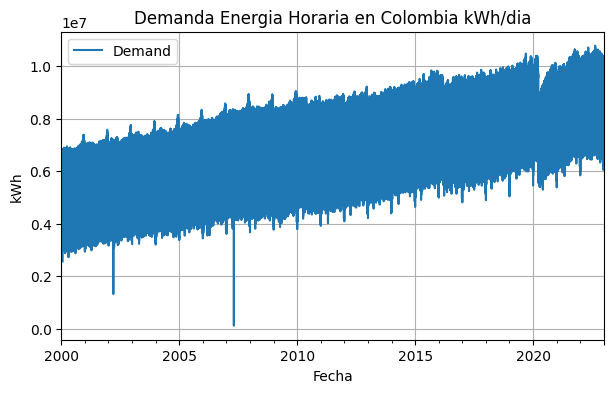

In [ ]:
# Visualización de datos utilizando gráfico de línea

# Generar un gráfico de línea a partir de los datos en 'df1'
df1.plot(
    kind='line',                     # Tipo de gráfico (línea)
    figsize=(7, 4),                  # Tamaño de la figura
    title='Demanda Energia Horaria en Colombia kWh/dia',  # Título del gráfico
    grid=True,                       # Mostrar cuadrícula
    ylabel='kWh',                    # Etiqueta del eje y
    xlabel='Fecha',                  # Etiqueta del eje x
    xlim=('2000-01-01', '2022-12-31')  # Límites del eje x
)

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh/dia'}, xlabel='Fecha', ylabel='kWh'>

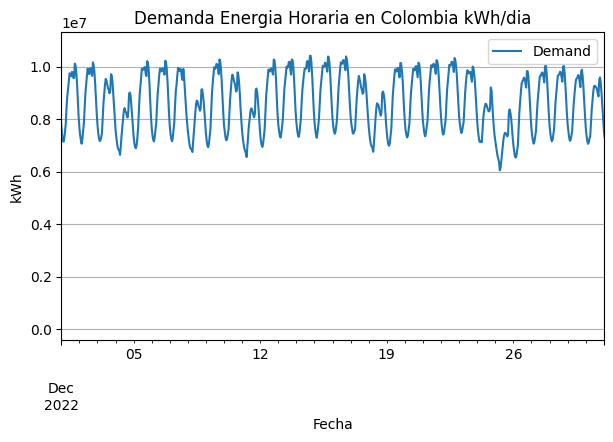

In [ ]:
# Visualización de datos utilizando gráfico de línea con límites específicos

# Generar un gráfico de línea a partir de los datos en 'df1', con límites de fecha específicos
df1.plot(
    kind='line',                     # Tipo de gráfico (línea)
    figsize=(7, 4),                  # Tamaño de la figura
    title='Demanda Energia Horaria en Colombia kWh/dia',  # Título del gráfico
    grid=True,                       # Mostrar cuadrícula
    ylabel='kWh',                    # Etiqueta del eje y
    xlabel='Fecha',                  # Etiqueta del eje x
    xlim=('2022-12-01', '2022-12-31')  # Límites del eje x (rango de fechas)
)

# Normalizacion


In [ ]:
# Selección y procesamiento de una porción de datos

# Seleccionar y extraer una porción de datos del DataFrame 'df1'
Ts1 = df1['2020-10-01':'2022-12-31'].values  # Un año

# Imprimir el tamaño de la serie horaria resultante
print('Tamaño Serie Horaria: ', len(Ts1))

Tamaño Serie Horaria:  19728


In [ ]:
# Escalado de los datos utilizando Min-Max Scaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador a los datos de la serie horaria 'Ts1'
scaler.fit(Ts1)

# Transformar los datos de 'Ts1' utilizando el escalador
Ts1 = scaler.transform(Ts1)

# Modelos DL


## Time Step=30

### Conjunto de Entrenamiento

In [ ]:
# Particionamiento de datos en conjuntos de entrenamiento y prueba

# Definición del valor de 'step_back'
step_back = 30

# Generación de conjuntos de entrenamiento y salida utilizando la función 'TrainingSet'
X1, Y1 = TrainingSet(Ts1, step_back)

# Definición del valor de 'Part' para el particionamiento Train-Test
Part = 0.8

# Particionamiento de conjuntos de entrenamiento y prueba
# Serie 1
X_train = X1[:15781].reshape(15781, step_back)
X_Val = X1[15781:16570].reshape(789, step_back)
X_test = X1[16570:].reshape(3128, step_back)

# Particionamiento de conjuntos de salida correspondientes
Y_train = Y1[:15781].reshape(15781)
Y_Val = Y1[15781:16570].reshape(789)
Y_test = Y1[16570:].reshape(3128)

In [ ]:
# Imprimir información sobre los tamaños de los conjuntos de datos

# Imprimir tamaños de los conjuntos de entrenamiento
print('Tamaño X_train: ', X_train.shape, 'Tamaño Y_train: ', Y_train.shape)

# Imprimir tamaños de los conjuntos de validación
print('Tamaño X_val: ', X_Val.shape, 'Tamaño Y_val: ', Y_Val.shape)

# Imprimir tamaños de los conjuntos de prueba
print('Tamaño X_test: ', X_test.shape, 'Tamaño Y_test: ', Y_test.shape)

# Imprimir separador
print('-----------------------------------------------------------------------')

Tamaño X_train:  (15781, 30) Tamaño Y_train:  (15781,)
Tamaño X_val:  (789, 30) Tamaño Y_val:  (789,)
Tamaño X_test:  (3128, 30) Tamaño Y_test:  (3128,)
-----------------------------------------------------------------------


In [ ]:
# Configuración de entrenamiento del modelo

# Número de épocas de entrenamiento
N = 100

# Tamaño de lote (batch size) para el entrenamiento
bsz = 512

# Lista de devolución de llamadas (callbacks)
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, verbose=1),
]

### ANN

In [ ]:
# Creación y entrenamiento de un modelo de red neuronal densa (ANN)

# Definición de la arquitectura del modelo ANN
model_ANN = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=(step_back,)),  # Capa densa con 100 neuronas y entrada con forma (step_back,)
    keras.layers.Dense(100),                             # Capa densa con 100 neuronas
    keras.layers.Dense(100),                             # Capa densa con 100 neuronas
    keras.layers.Dense(1)                                # Capa densa de salida con 1 neurona
])
model_ANN.summary()

# Compilación y entrenamiento del modelo ANN
model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
model_ANN.fit(X_train, Y_train, epochs=N, batch_size=bsz, callbacks=callbacks, validation_data=[X_Val, Y_Val])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23,401
Trainable params: 23,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
31/31 [==============================] - 6s 10ms/step - loss: 0.1528 - mae: 0.2883 - mse: 0.1528 - val_loss: 0.0056 - val_mae: 0.0585 - val_mse: 0.0056 - lr: 0.0010
Epoch 2

In [ ]:
# Guardar y descargar el modelo entrenado

# Guardar el modelo entrenado en un archivo h5
model_ANN.save('model_MPL_U_30.h5')

# Imprimir mensaje de confirmación
print('Model Saved!')

# Descargar el archivo h5
files.download('/content/model_MPL_U_30.h5')

Model Saved!


In [ ]:
# Copiar conjuntos de datos para uso posterior

# Realizar copias de los conjuntos de entrenamiento y validación
X_train = X_train.copy()
y_train = Y_train.copy()
X_cal = X_Val.copy()
y_cal = Y_Val.copy()

# Copiar conjuntos de prueba para uso posterior
X_val = X_test.copy()
y_val = Y_test.copy()

In [ ]:
# Cálculo y evaluación del cuantil de las predicciones

# Definir nivel de confianza
alpha = 0.91

# Realizar predicciones utilizando el modelo ANN
f = model_ANN.predict(X_cal)

# Definir el modelo para el cálculo del cuantil
model = model_ANN

# Calcular la longitud del conjunto de validación
N = len(y_cal)

# Calcular el cuantil utilizando la función 'np.quantile'
q_yhat = np.quantile(np.abs(y_cal - f), np.ceil((N + 1) * (1 - alpha)) / N)

# Imprimir el valor del cuantil calculado
print(q_yhat)

25/25 [==============================] - 0s 1ms/step
0.02889007287768376


In [ ]:
# Realizar predicciones utilizando el modelo en el conjunto de validación
f_val = model.predict(X_val).flatten()

98/98 [==============================] - 0s 1ms/step


In [ ]:
# Función para calcular la cobertura y cálculo de la cobertura

def calculate_coverage(lower_bound, upper_bound, y_true):
    """
    Calcula la cobertura de un intervalo de predicción respecto a los valores reales.

    Parámetros:
    - lower_bound (array-like): Límites inferiores del intervalo de predicción.
    - upper_bound (array-like): Límites superiores del intervalo de predicción.
    - y_true (array-like): Valores reales o verdaderos.

    Retorna:
    - coverage (float): Cobertura del intervalo de predicción.

    Notas:
    - Esta función calcula la cobertura de un intervalo de predicción para un conjunto de valores reales.
    - 'lower_bound' y 'upper_bound' son listas o arrays con los límites inferior y superior del intervalo,
      respectivamente.
    - 'y_true' es una lista o array con los valores reales correspondientes.
    - La función calcula cuántos valores reales están fuera del intervalo de predicción y devuelve la
      fracción de valores dentro del intervalo.
    """

    out_of_bound = 0
    N = len(y_true)

    for i in range(N):
        if y_true[i] < lower_bound[i] or y_true[i] > upper_bound[i]:
            out_of_bound += 1

    return 1 - out_of_bound / N

# Calcular y mostrar la cobertura
lower_bound = f_val - q_yhat
upper_bound = f_val + q_yhat
Cover = calculate_coverage(lower_bound, upper_bound, y_val)
print('Coverage of {}'.format(Cover))

Coverage of 0.8586956521739131


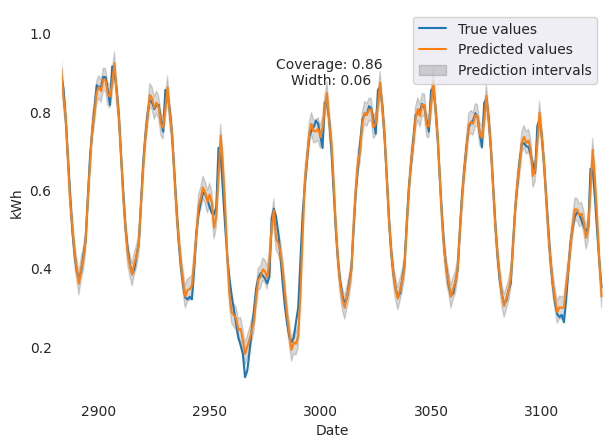

In [ ]:
# Visualización de resultados utilizando gráficos

# Configurar el tamaño predeterminado de las figuras
plt.rcParams["figure.figsize"] = (7, 5)

# Configurar el estilo de la grilla
sns.set_style("darkgrid", {'axes.grid': True})

# Crear una lista de índices
ind = [i for i in range(len(y_val))]

# Graficar los valores verdaderos y predichos
plt.plot(ind, y_val, label='True values')
plt.plot(ind, f_val, label='Predicted values')

# Rellenar el área entre los intervalos de predicción
plt.fill_between(ind, f_val - q_yhat, f_val + q_yhat,
                 color='k', alpha=.15, label='Prediction intervals')

# Establecer límites en el eje x
plt.xlim(2883, 3128)

# Calcular posición para el texto de cobertura y ancho
center_x = (2883 + 3128) / 2
center_y = (max(f_val) + min(f_val)) / 2
plt.text(3005, 0.9, f"Coverage: {round(Cover, 2)} \nWidth: {round(2 * q_yhat, 2)}",
         ha="center", va="center")

# Establecer etiquetas de ejes
plt.xlabel("Date")
plt.ylabel("kWh")

# Cambiar el fondo del gráfico a blanco
plt.gca().set_facecolor('white')

# Mostrar los bordes de los ejes
for spine in plt.gca().spines.values():
    spine.set_visible(True)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Imprimir el doble del ancho del intervalo de predicción
print(2 * q_yhat)

0.05778014575536752


## TimeStep =36

### Conjunto de Entrenamiento


In [ ]:
# Configuración y particionamiento de datos para un modelo

# Definición de las variables para el entrenamiento del modelo
N = 100    # Número de épocas
bsz = 512  # Tamaño del lote (batch size)

# Definición del valor de 'step_back' para el particionamiento de datos
step_back = 36

# Generación de conjuntos de entrenamiento y salida utilizando la función 'TrainingSet'
X1, Y1 = TrainingSet(Ts1, step_back)

# Definición del valor de 'Part' para el particionamiento Train-Test
Part = 0.8

# Particionamiento de conjuntos de entrenamiento y prueba
# Serie 1
X_train = X1[:15781].reshape(15781, step_back)
X_Val = X1[15781:16570].reshape(789, step_back)
X_test = X1[16570:].reshape(3122, step_back)

# Particionamiento de conjuntos de salida correspondientes
Y_train = Y1[:15781].reshape(15781)
Y_Val = Y1[15781:16570].reshape(789)
Y_test = Y1[16570:].reshape(3122)

In [ ]:
# Imprimir información sobre los tamaños de los conjuntos de datos

# Imprimir tamaños de los conjuntos de entrenamiento
print('Tamaño X_train: ', X_train.shape, 'Tamaño Y_train: ', Y_train.shape)

# Imprimir tamaños de los conjuntos de validación
print('Tamaño X_val: ', X_Val.shape, 'Tamaño Y_val: ', Y_Val.shape)

# Imprimir tamaños de los conjuntos de prueba
print('Tamaño X_test: ', X_test.shape, 'Tamaño Y_test: ', Y_test.shape)

# Imprimir separador
print('-----------------------------------------------------------------------')

Tamaño X_train:  (15781, 36) Tamaño Y_train:  (15781,)
Tamaño X_val:  (789, 36) Tamaño Y_val:  (789,)
Tamaño X_test:  (3122, 36) Tamaño Y_test:  (3122,)
-----------------------------------------------------------------------


### RNN

In [ ]:
# Creación y entrenamiento de un modelo de red neuronal recurrente (RNN) simple

# Definición de la arquitectura del modelo RNN
model_RNN = keras.models.Sequential([
    keras.layers.SimpleRNN(100, return_sequences=True, input_shape=(step_back, 1)),  # Capa RNN con 100 unidades y entrada de forma (step_back, 1)
    keras.layers.SimpleRNN(100, return_sequences=True),                             # Capa RNN con 100 unidades
    keras.layers.SimpleRNN(100, return_sequences=True),                             # Capa RNN con 100 unidades
    keras.layers.SimpleRNN(1)                                                      # Capa RNN de salida con 1 unidad
])
model_RNN.summary()

# Compilación y entrenamiento del modelo RNN
metrics = ['mae', 'mse']
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_RNN.fit(X_train, Y_train, epochs=100, batch_size=bsz, callbacks=callbacks, validation_data=[X_Val, Y_Val])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 36, 100)           10200     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 36, 100)           20100     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 36, 100)           20100     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 102       
                                                                 
Total params: 50,502
Trainable params: 50,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
31/31 [==============================] - 9s 163ms/step - loss: 0.0249 - mae: 0.1205 - mse: 0.0249 - val_loss: 0.0079 - val_mae: 0.0748 - val_mse: 0.0079 - lr: 0.0010
Epoc

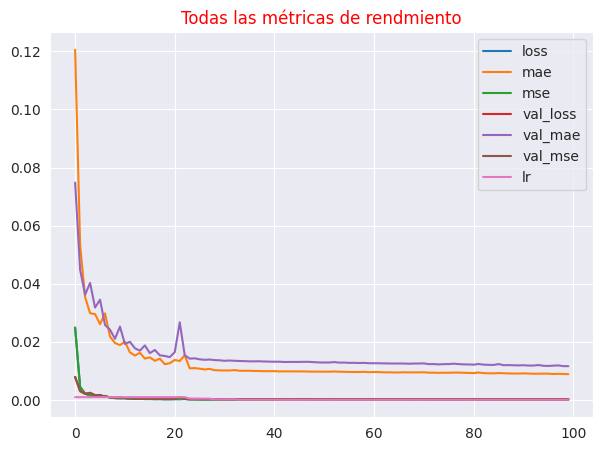

In [ ]:
# Visualización del historial de métricas de rendimiento durante el entrenamiento

# Crear un DataFrame 'hpd' con el historial de métricas del entrenamiento
hpd = pd.DataFrame(history.history)

# Generar un gráfico con las métricas de rendimiento
hpd.plot()

# Configurar título y detalles del gráfico
plt.title('Todas las métricas de rendimiento', color='red')  # Título del gráfico
plt.grid(True)                                             # Mostrar cuadrícula en el gráfico

# Mostrar el gráfico
plt.show()

In [ ]:
# Guardar y descargar el modelo entrenado

# Guardar el modelo entrenado en un archivo h5
model_RNN.save('model_RNN_U_36.h5')

# Imprimir mensaje de confirmación
print('Model Saved!')

# Descargar el archivo h5
files.download('/content/model_RNN_U_36.h5')

Model Saved!


In [ ]:
# Copiar conjuntos de datos para uso posterior

# Realizar copias de los conjuntos de entrenamiento y validación
X_train = X_train.copy()
y_train = Y_train.copy()
X_cal = X_Val.copy()
y_cal = Y_Val.copy()

# Copiar conjuntos de prueba para uso posterior
X_val = X_test.copy()
y_val = Y_test.copy()

## Conformal RNN U 36

In [ ]:
# Cálculo y evaluación del cuantil de las predicciones

# Definir nivel de confianza
alpha = 0.91

# Realizar predicciones utilizando el modelo GRU
f = model_RNN.predict(X_cal)

# Definir el modelo para el cálculo del cuantil
model = model_RNN

# Calcular la longitud del conjunto de validación
N = len(y_cal)

# Calcular el cuantil utilizando la función 'np.quantile'
q_yhat = np.quantile(np.abs(y_cal - f), np.ceil((N + 1) * (1 - alpha)) / N)

# Imprimir el valor del cuantil calculado
print(q_yhat)

25/25 [==============================] - 1s 12ms/step
0.027893982976903514
98/98 [==============================] - 1s 13ms/step


In [ ]:
# Función para calcular la cobertura y cálculo de la cobertura

def calculate_coverage(lower_bound, upper_bound, y_true):
    """
    Calcula la cobertura de un intervalo de predicción respecto a los valores reales.

    Parámetros:
    - lower_bound (array-like): Límites inferiores del intervalo de predicción.
    - upper_bound (array-like): Límites superiores del intervalo de predicción.
    - y_true (array-like): Valores reales o verdaderos.

    Retorna:
    - coverage (float): Cobertura del intervalo de predicción.

    Notas:
    - Esta función calcula la cobertura de un intervalo de predicción para un conjunto de valores reales.
    - 'lower_bound' y 'upper_bound' son listas o arrays con los límites inferior y superior del intervalo,
      respectivamente.
    - 'y_true' es una lista o array con los valores reales correspondientes.
    - La función calcula cuántos valores reales están fuera del intervalo de predicción y devuelve la
      fracción de valores dentro del intervalo.
    """

    out_of_bound = 0
    N = len(y_true)

    for i in range(N):
        if y_true[i] < lower_bound[i] or y_true[i] > upper_bound[i]:
            out_of_bound += 1

    return 1 - out_of_bound / N

# Calcular y mostrar la cobertura
lower_bound = f_val - q_yhat
upper_bound = f_val + q_yhat
Cover = calculate_coverage(lower_bound, upper_bound, y_val)
print('Coverage of {}'.format(Cover))

Coverage of 0.9423446508648302


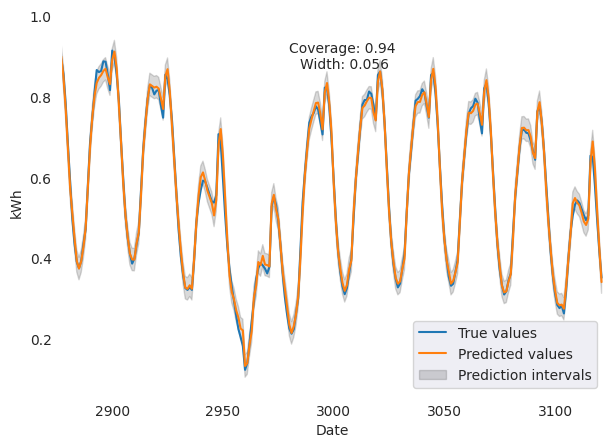

In [ ]:
# Visualización de resultados utilizando gráficos

# Configurar el tamaño predeterminado de las figuras
plt.rcParams["figure.figsize"] = (7, 5)

# Configurar el estilo de la grilla
sns.set_style("darkgrid", {'axes.grid': True})

# Crear una lista de índices
ind = [i for i in range(len(y_val))]

# Graficar los valores verdaderos y predichos
plt.plot(ind, y_val, label='True values')
plt.plot(ind, f_val, label='Predicted values')

# Rellenar el área entre los intervalos de predicción
plt.fill_between(ind, f_val - q_yhat, f_val + q_yhat,
                 color='k', alpha=.15, label='Prediction intervals')

# Establecer límites en el eje x
plt.xlim(2883, 3128)

# Calcular posición para el texto de cobertura y ancho
center_x = (2883 + 3128) / 2
center_y = (max(f_val) + min(f_val)) / 2
plt.text(3005, 0.9, f"Coverage: {round(Cover, 2)} \nWidth: {round(2 * q_yhat, 2)}",
         ha="center", va="center")

# Establecer etiquetas de ejes
plt.xlabel("Date")
plt.ylabel("kWh")

# Cambiar el fondo del gráfico a blanco
plt.gca().set_facecolor('white')

# Mostrar los bordes de los ejes
for spine in plt.gca().spines.values():
    spine.set_visible(True)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Imprimir el doble del ancho del intervalo de predicción
print(2 * q_yhat)

0.05578796595380703


# Tiempo

In [ ]:
# Cálculo del tiempo transcurrido

# Registrar el tiempo de finalización
fin = time.time()

# Calcular el tiempo transcurrido
tiempo_transcurrido = fin - inicio

# Imprimir el tiempo transcurrido en segundos
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  476.48504114151 segundos
